# Estudio de Rendimiento Backend en OPAR

En este estudio de rendimiento, evaluaremos el comportamiento del backend de la aplicación OPAR en dos áreas clave: **inmuebles** y **opiniones**. El apartado de inmuebles se centra en la capacidad del sistema para gestionar y procesar eficientemente las búsquedas, filtros (por precio, barrio, tipo de inmueble) y la carga de información detallada de cada propiedad disponible para alquiler. En cuanto a opiniones, se medirá el rendimiento en la recopilación, almacenamiento y recuperación de calificaciones y comentarios de los usuarios, asegurando que el sistema pueda ofrecer resultados rápidos y precisos al momento de consultar la reputación de un inmueble. El objetivo es garantizar una experiencia de usuario ágil y confiable, con tiempos de respuesta optimizados y una gestión eficiente de los datos en ambas secciones.


### Integrantes:
- Juan Camilo Lozada Garavito – 2205560
- Daniel Camilo Barrera Pérez – 2205562
- Jerson Julian Cañon Castillo – 2205633
- Santiago González Flores - 2200165

## Versión 1
En esta primera versión del backend, se implementará una arquitectura basada en contenedores utilizando Docker. Se configurarán dos contenedores: uno para el backend, que gestionará la lógica de la aplicación y la API, y otro para la base de datos, que almacenará los datos de inmuebles y opiniones de los usuarios. El objetivo es evaluar cómo se comporta el backend al ser desplegado en este entorno de contenedores, garantizando que ambos servicios interactúen de manera eficiente y escalable. 
<div style="margin-left: 200px;">
    <img src="./Multimedia/V1.png" alt="Diagrama versión 1" width="500px" height="220">
</div>


### Cargamos las librerias

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
data = pd.read_csv("./v1/añadir_inmueble_12000_graph_result.csv")
data.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1733099201304,534,Añadir Inmueble,200,NaN,Thread Group 1-4,text,True,NaN,695,440,527,527,http://127.0.0.1:8081/api/inmuebles/agregar,528,0,1
1,1733099201304,534,Añadir Inmueble,200,NaN,Thread Group 1-6,text,True,NaN,695,440,526,526,http://127.0.0.1:8081/api/inmuebles/agregar,528,0,1
2,1733099201305,533,Añadir Inmueble,200,NaN,Thread Group 1-7,text,True,NaN,695,440,526,526,http://127.0.0.1:8081/api/inmuebles/agregar,528,0,1
3,1733099201309,529,Añadir Inmueble,200,NaN,Thread Group 1-13,text,True,NaN,695,440,527,527,http://127.0.0.1:8081/api/inmuebles/agregar,529,0,0
4,1733099201304,534,Añadir Inmueble,200,NaN,Thread Group 1-3,text,True,NaN,695,440,526,526,http://127.0.0.1:8081/api/inmuebles/agregar,528,0,1


##### Al añadir un inmueble

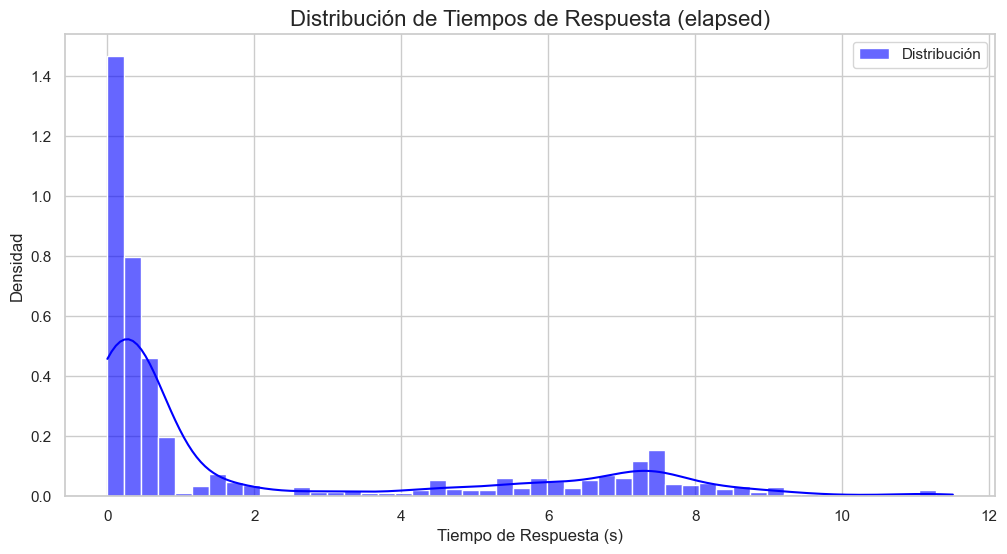

In [10]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data['elapsed']/1000, bins=50, kde=True, color='blue', stat="density", alpha=0.6, label="Distribución")

plt.title("Distribución de Tiempos de Respuesta (elapsed)", fontsize=16)
plt.xlabel("Tiempo de Respuesta (s)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()


plt.show()

- Podemos ver que el el tiempo más cómun de respuesta es de menos 1 segundo.
- La mayoria de los tiempos de respuesta son bajos, pero hay algunos tiempos de respuesta significativamente mayores.

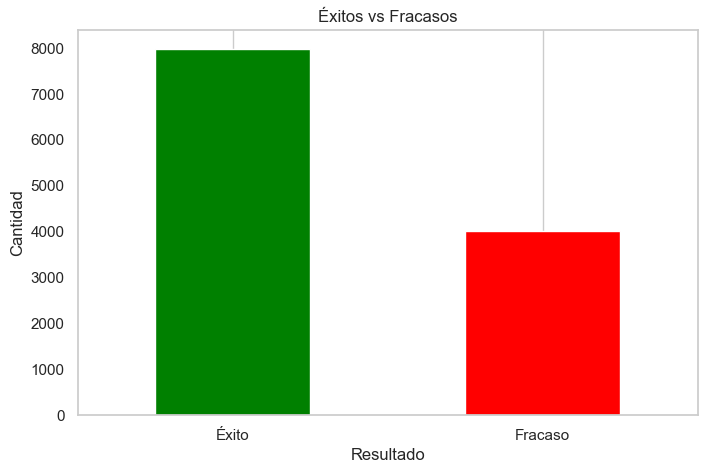

In [11]:
success_counts = data['success'].value_counts()

plt.figure(figsize=(8, 5))
success_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Éxitos vs Fracasos')
plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Éxito', 'Fracaso'], rotation=0)
plt.grid(axis='y')
plt.show()

Aproximadamente el 66% de las solicitudes están siendo procesadas correctamente, sin embargo, hay una proporción considerable de solicitudes que están fallando.

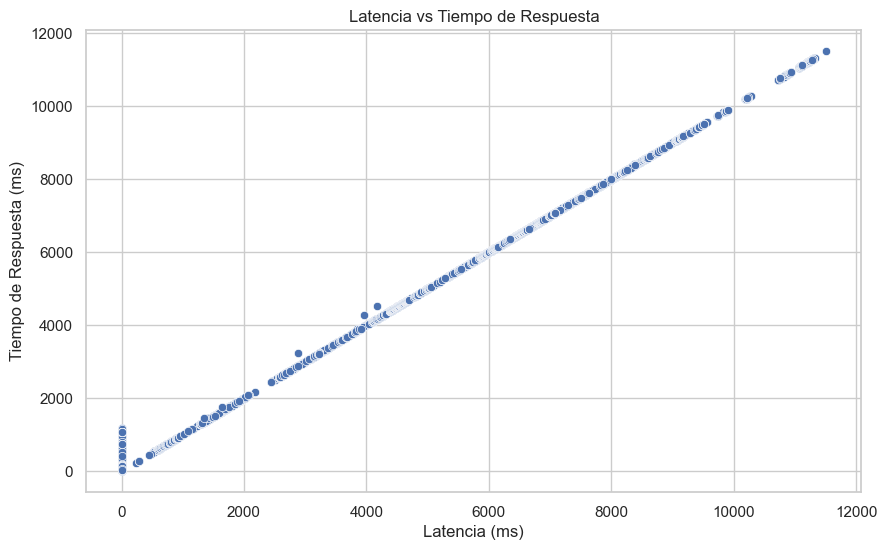

In [12]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Latency', y='elapsed', data=data) 
plt.title('Latencia vs Tiempo de Respuesta') 
plt.xlabel('Latencia (ms)') 
plt.ylabel('Tiempo de Respuesta (ms)') 
plt.show()

 A medida que la latencia aumenta, también lo hace el tiempo de respuesta. Sugiriendo que la latencia esta afectando directamente el rendimiento del sistema.

In [ ]:
data = pd.read_csv("./v1/añadir_opinion_12000_summary_report.csv")
data.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1733091472892,96,Añadir Opinion,200,NaN,Thread Group 1-3,text,True,NaN,660,375,59,59,http://127.0.0.1:8081/api/opiniones/agregar,96,0,1
1,1733091472891,106,Añadir Opinion,200,NaN,Thread Group 1-4,text,True,NaN,660,375,60,60,http://127.0.0.1:8081/api/opiniones/agregar,106,0,2
2,1733091472892,105,Añadir Opinion,200,NaN,Thread Group 1-9,text,True,NaN,660,375,60,60,http://127.0.0.1:8081/api/opiniones/agregar,105,0,1
3,1733091472893,104,Añadir Opinion,200,NaN,Thread Group 1-10,text,True,NaN,660,375,60,60,http://127.0.0.1:8081/api/opiniones/agregar,104,0,0
4,1733091472892,105,Añadir Opinion,200,NaN,Thread Group 1-1,text,True,NaN,660,375,60,60,http://127.0.0.1:8081/api/opiniones/agregar,105,0,1


#### Al añadir una opinión

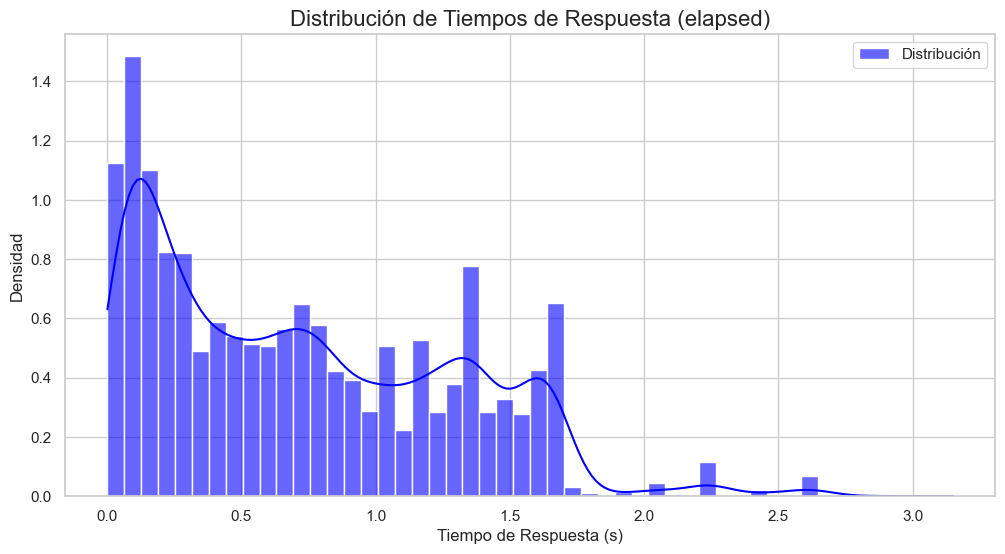

In [15]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data['elapsed']/1000, bins=50, kde=True, color='blue', stat="density", alpha=0.6, label="Distribución")

plt.title("Distribución de Tiempos de Respuesta (elapsed)", fontsize=16)
plt.xlabel("Tiempo de Respuesta (s)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()


plt.show()

- En el rango de 0 a 1.7 segundos hay una mayor densidad de tiempos de respuesta.
- Se observa una variabilidad en el rendimiento al tener varios valles.

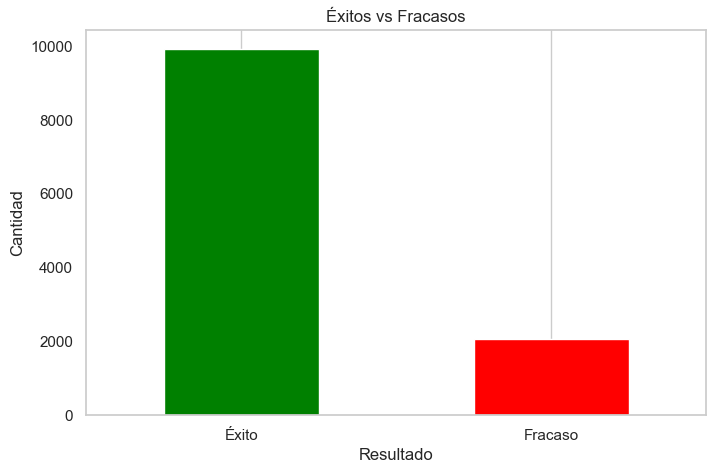

In [16]:
success_counts = data['success'].value_counts()

plt.figure(figsize=(8, 5))
success_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Éxitos vs Fracasos')
plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Éxito', 'Fracaso'], rotation=0)
plt.grid(axis='y')
plt.show()

Aproximadamente el 0.83% de las solicitudes están siendo procesadas correctamente.

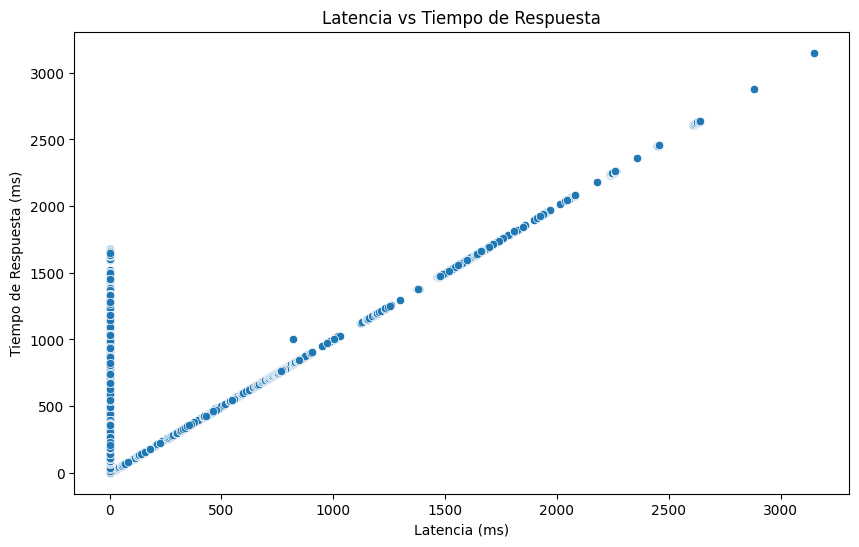

In [6]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Latency', y='elapsed', data=data) 
plt.title('Latencia vs Tiempo de Respuesta') 
plt.xlabel('Latencia (ms)') 
plt.ylabel('Tiempo de Respuesta (ms)') 
plt.show()

 A medida que la latencia aumenta, también lo hace el tiempo de respuesta. Sugiriendo que la latencia esta afectando directamente el rendimiento del sistema. Pero en este caso cuando la latencia es 0 se tiene un tiempo de respuestas de 0 a 1700ms aproximadamente.

In [9]:
data = pd.read_csv("./v1/editar_opinion_12000_summary_report.csv")
data.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1733091315870,398,Editar Opinion,200,NaN,Thread Group 1-188,text,True,NaN,1376,397,791,791,http://127.0.0.1:8081/api/opiniones/editar,398,0,0
1,1733091315884,385,Editar Opinion,200,NaN,Thread Group 1-203,text,True,NaN,1376,397,791,791,http://127.0.0.1:8081/api/opiniones/editar,384,0,1
2,1733091315860,409,Editar Opinion,200,NaN,Thread Group 1-2548,text,True,NaN,1376,397,791,791,http://127.0.0.1:8081/api/opiniones/editar,408,0,0
3,1733091315872,397,Editar Opinion,200,NaN,Thread Group 1-190,text,True,NaN,1376,397,791,791,http://127.0.0.1:8081/api/opiniones/editar,397,0,0
4,1733091315876,394,Editar Opinion,200,NaN,Thread Group 1-194,text,True,NaN,1376,397,789,789,http://127.0.0.1:8081/api/opiniones/editar,393,0,1


#### Al editar una opinión

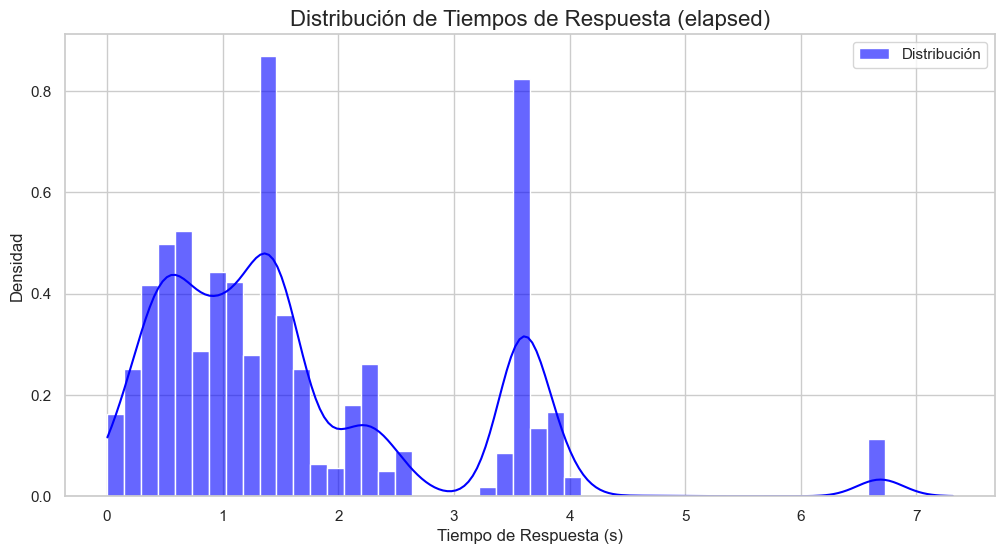

In [10]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data['elapsed']/1000, bins=50, kde=True, color='blue', stat="density", alpha=0.6, label="Distribución")

plt.title("Distribución de Tiempos de Respuesta (elapsed)", fontsize=16)
plt.xlabel("Tiempo de Respuesta (s)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()


plt.show()

- Se observa una variabilidad en el rendimiento al tener varios valles.
- Se tienen algunos valores atípicos cerca de los 7 segundos de respuesta.

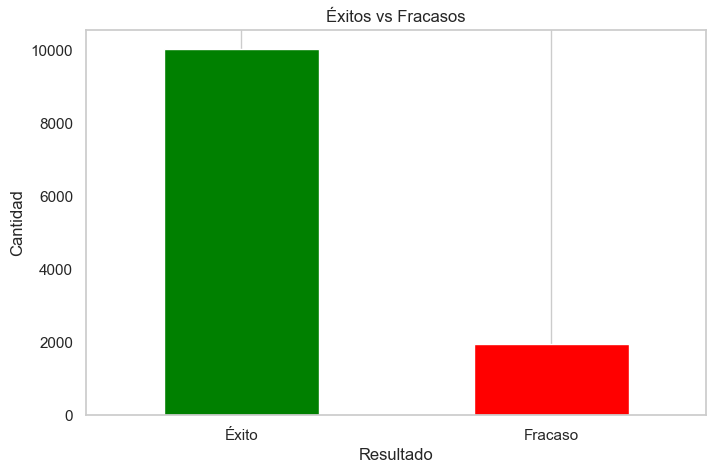

In [11]:
success_counts = data['success'].value_counts()

plt.figure(figsize=(8, 5))
success_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Éxitos vs Fracasos')
plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Éxito', 'Fracaso'], rotation=0)
plt.grid(axis='y')
plt.show()

Aproximadamente el 0.83% de las solicitudes están siendo procesadas correctamente.

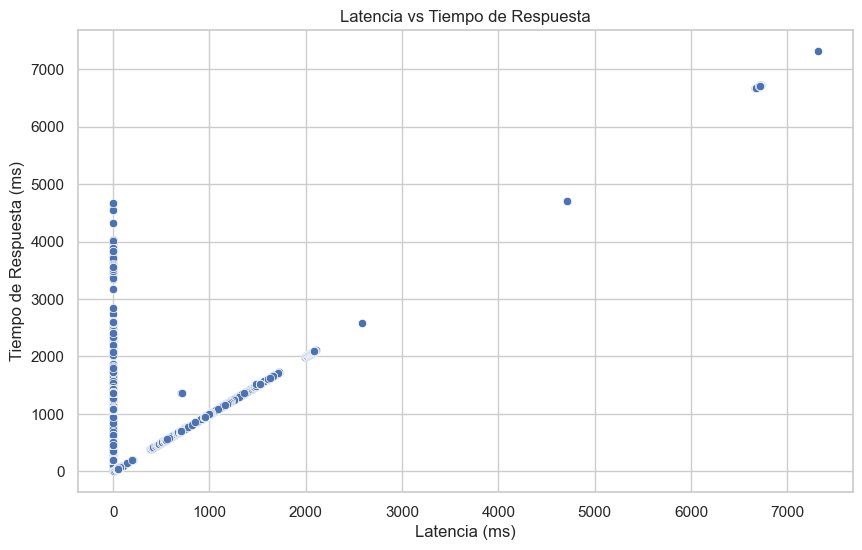

In [12]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Latency', y='elapsed', data=data) 
plt.title('Latencia vs Tiempo de Respuesta') 
plt.xlabel('Latencia (ms)') 
plt.ylabel('Tiempo de Respuesta (ms)') 
plt.show()

A pesar de la baja latencia, los tiempos de respuesta alcanzan los 5000 ms. Esto podría deberse a congestión en la red o sobrecarga del servidor, lo que afecta la experiencia del usuario. Sería necesario investigar posibles cuellos de botella y optimizar la infraestructura.

In [14]:
data = pd.read_csv("./v1/listar_inmuebles_12000_summary_report.csv")
data.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1733090960598,850,Listar Inmueble,Non HTTP response code: org.apache.http.conn.H...,Non HTTP response message: Connect to 127.0.0....,Thread Group 1-488,text,False,NaN,2595,0,2289,2289,http://127.0.0.1:8081/api/inmuebles/list,0,0,850
1,1733090961026,463,Listar Inmueble,Non HTTP response code: org.apache.http.conn.H...,Non HTTP response message: Connect to 127.0.0....,Thread Group 1-1979,text,False,NaN,2595,0,2292,2292,http://127.0.0.1:8081/api/inmuebles/list,0,0,463
2,1733090960867,648,Listar Inmueble,Non HTTP response code: org.apache.http.conn.H...,Non HTTP response message: Connect to 127.0.0....,Thread Group 1-1416,text,False,NaN,2595,0,2292,2292,http://127.0.0.1:8081/api/inmuebles/list,0,0,648
3,1733090960547,968,Listar Inmueble,Non HTTP response code: org.apache.http.conn.H...,Non HTTP response message: Connect to 127.0.0....,Thread Group 1-114,text,False,NaN,2595,0,2292,2292,http://127.0.0.1:8081/api/inmuebles/list,0,0,968
4,1733090960679,853,Listar Inmueble,Non HTTP response code: org.apache.http.conn.H...,Non HTTP response message: Connect to 127.0.0....,Thread Group 1-330,text,False,NaN,2595,0,2292,2292,http://127.0.0.1:8081/api/inmuebles/list,0,0,853


#### Al listar los inmuebles

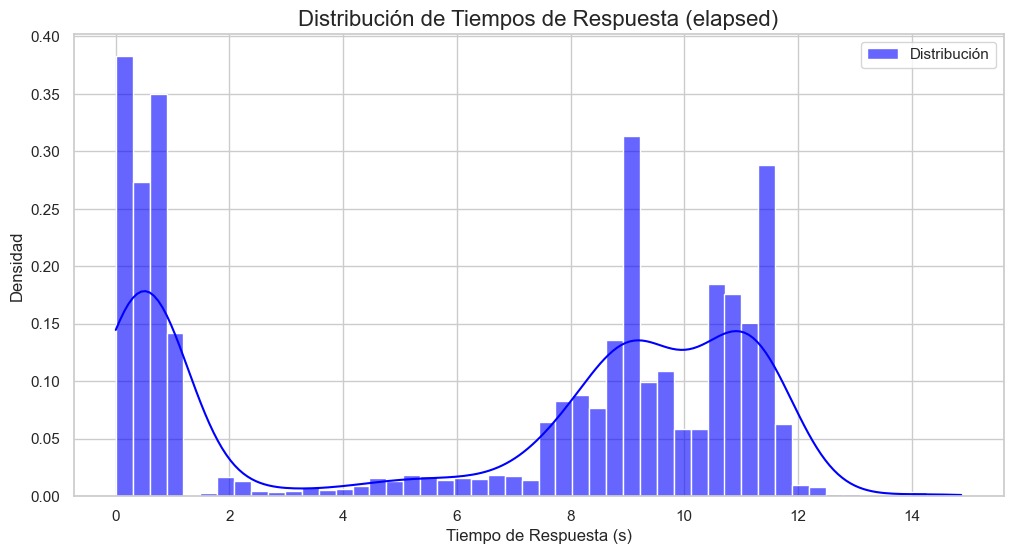

In [15]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data['elapsed']/1000, bins=50, kde=True, color='blue', stat="density", alpha=0.6, label="Distribución")

plt.title("Distribución de Tiempos de Respuesta (elapsed)", fontsize=16)
plt.xlabel("Tiempo de Respuesta (s)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()


plt.show()

Se observa que el tiempo de respuesta aumenta significativamente llegando a tardar hasta 12 segundos en dar una respuesta indicando problemas en el rendimiento a la hora de querer obtener los inmuebles.

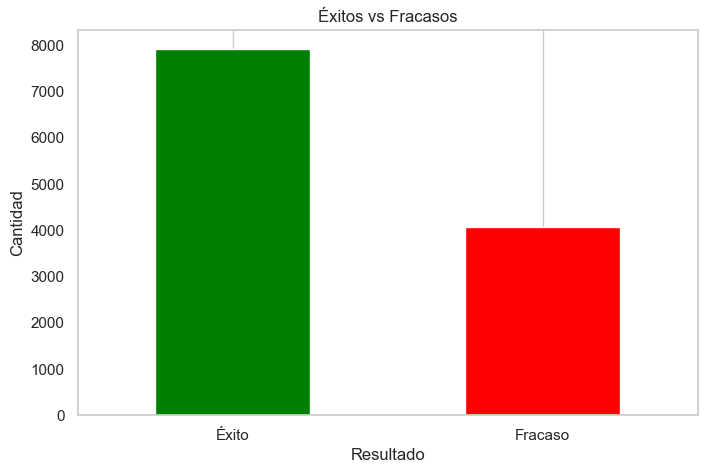

In [16]:
success_counts = data['success'].value_counts()

plt.figure(figsize=(8, 5))
success_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Éxitos vs Fracasos')
plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Éxito', 'Fracaso'], rotation=0)
plt.grid(axis='y')
plt.show()

Aproximadamente el 66% de las solicitudes están siendo procesadas correctamente, sin embargo, hay una proporción considerable de solicitudes que están fallando

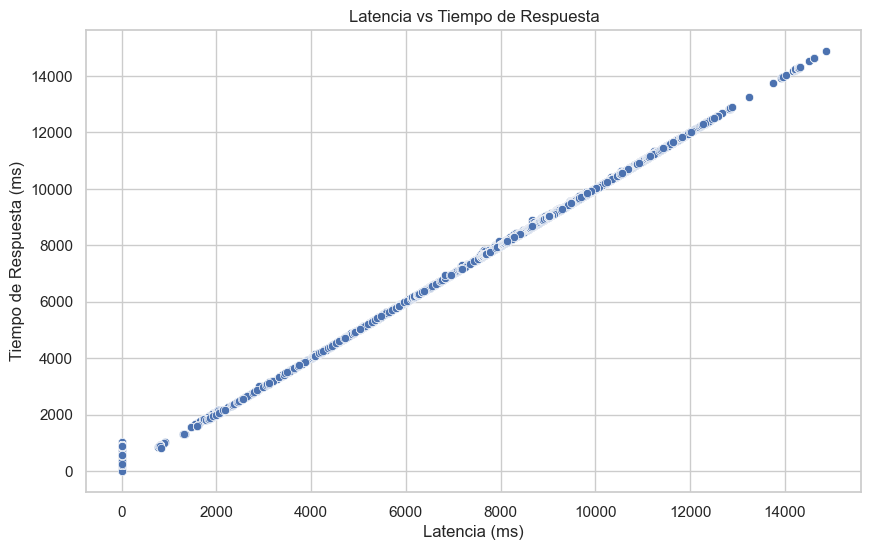

In [17]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Latency', y='elapsed', data=data) 
plt.title('Latencia vs Tiempo de Respuesta') 
plt.xlabel('Latencia (ms)') 
plt.ylabel('Tiempo de Respuesta (ms)') 
plt.show()

 A medida que la latencia aumenta, también lo hace el tiempo de respuesta. Sugiriendo que la latencia esta afectando directamente el rendimiento del sistema.

In [21]:
data = pd.read_csv("./v1/lista_opinion_inmueble_12000_summary_report.csv")
data.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1733091108256,478,Obtener Opinion por Inmueble,Non HTTP response code: org.apache.http.conn.H...,Non HTTP response message: Connect to 127.0.0....,Thread Group 1-4195,text,False,NaN,2595,0,4705,4705,http://127.0.0.1:8081/api/opiniones/inmuebles,0,0,246
1,1733091107556,1178,Obtener Opinion por Inmueble,Non HTTP response code: org.apache.http.conn.H...,Non HTTP response message: Connect to 127.0.0....,Thread Group 1-1524,text,False,NaN,2595,0,4705,4705,http://127.0.0.1:8081/api/opiniones/inmuebles,0,0,946
2,1733091107582,1154,Obtener Opinion por Inmueble,Non HTTP response code: org.apache.http.conn.H...,Non HTTP response message: Connect to 127.0.0....,Thread Group 1-744,text,False,NaN,2595,0,4705,4705,http://127.0.0.1:8081/api/opiniones/inmuebles,0,0,921
3,1733091107565,1171,Obtener Opinion por Inmueble,Non HTTP response code: org.apache.http.conn.H...,Non HTTP response message: Connect to 127.0.0....,Thread Group 1-1600,text,False,NaN,2595,0,4705,4705,http://127.0.0.1:8081/api/opiniones/inmuebles,0,0,939
4,1733091107859,877,Obtener Opinion por Inmueble,Non HTTP response code: org.apache.http.conn.H...,Non HTTP response message: Connect to 127.0.0....,Thread Group 1-2645,text,False,NaN,2595,0,4705,4705,http://127.0.0.1:8081/api/opiniones/inmuebles,0,0,646


#### Al listar los opniones de un inmueble

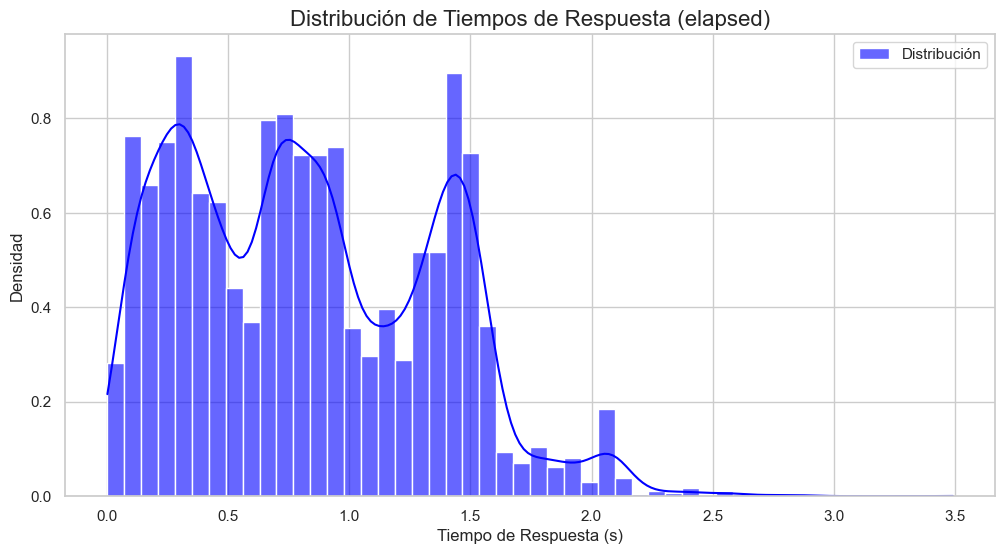

In [22]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data['elapsed']/1000, bins=50, kde=True, color='blue', stat="density", alpha=0.6, label="Distribución")

plt.title("Distribución de Tiempos de Respuesta (elapsed)", fontsize=16)
plt.xlabel("Tiempo de Respuesta (s)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()

plt.show()

- Se observan algunos tiempos comunes de respuesta como 0.25s, 0.75s y 1.4s.
- También se tiene una variabilidad en los tiempos de respuesta al haber varios valles.

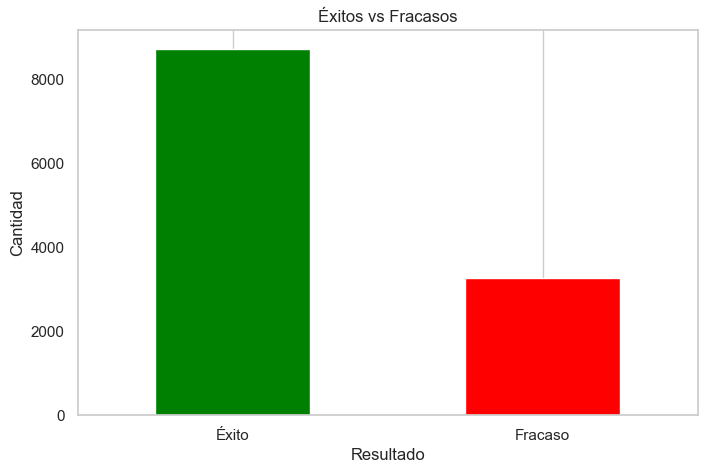

In [23]:
success_counts = data['success'].value_counts()

plt.figure(figsize=(8, 5))
success_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Éxitos vs Fracasos')
plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Éxito', 'Fracaso'], rotation=0)
plt.grid(axis='y')
plt.show()

Aproximadamente el 75% de las solicitudes están siendo procesadas correctamente, sin embargo, hay una proporción considerable de solicitudes que están fallando.

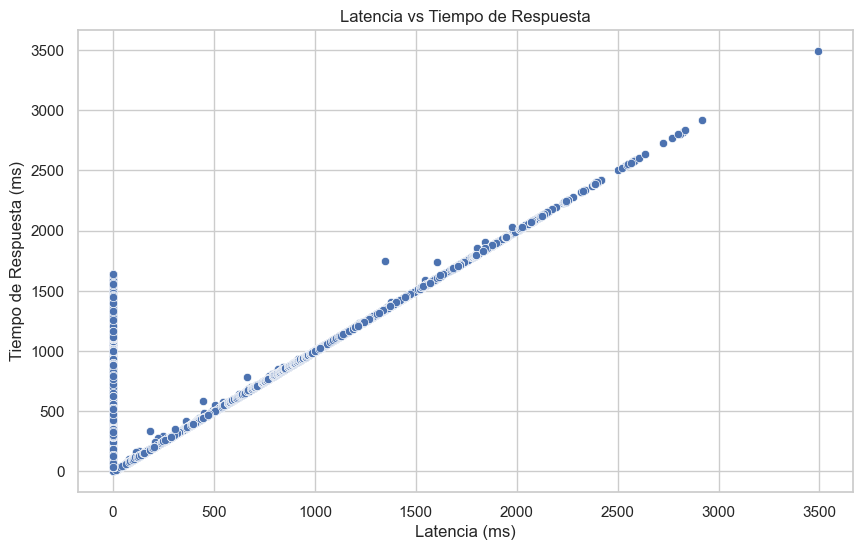

In [24]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Latency', y='elapsed', data=data) 
plt.title('Latencia vs Tiempo de Respuesta') 
plt.xlabel('Latencia (ms)') 
plt.ylabel('Tiempo de Respuesta (ms)') 
plt.show()

 A medida que la latencia aumenta, también lo hace el tiempo de respuesta. Sugiriendo que la latencia esta afectando directamente el rendimiento del sistema. Pero en este caso cuando la latencia es 0 se tiene un tiempo de respuestas de 0 a 1600ms aproximadamente.

In [28]:
data = pd.read_csv("./v1/lista_opinion_usuario_12000_summary_report.csv")
data.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1733091237920,488,Obtener Opinion por Usuario,200,NaN,Thread Group 1-8,NaN,True,NaN,210,250,1134,1134,http://127.0.0.1:8081/api/opiniones/usuario,488,0,0
1,1733091237922,485,Obtener Opinion por Usuario,200,NaN,Thread Group 1-9,NaN,True,NaN,210,250,1134,1134,http://127.0.0.1:8081/api/opiniones/usuario,485,0,1
2,1733091237941,466,Obtener Opinion por Usuario,200,NaN,Thread Group 1-35,NaN,True,NaN,210,250,1134,1134,http://127.0.0.1:8081/api/opiniones/usuario,466,0,1
3,1733091237918,489,Obtener Opinion por Usuario,200,NaN,Thread Group 1-3,NaN,True,NaN,210,250,1134,1134,http://127.0.0.1:8081/api/opiniones/usuario,489,0,0
4,1733091237954,457,Obtener Opinion por Usuario,200,NaN,Thread Group 1-55,NaN,True,NaN,210,250,1142,1142,http://127.0.0.1:8081/api/opiniones/usuario,457,0,0


#### Al listar las opiniones realizadas por un usuario

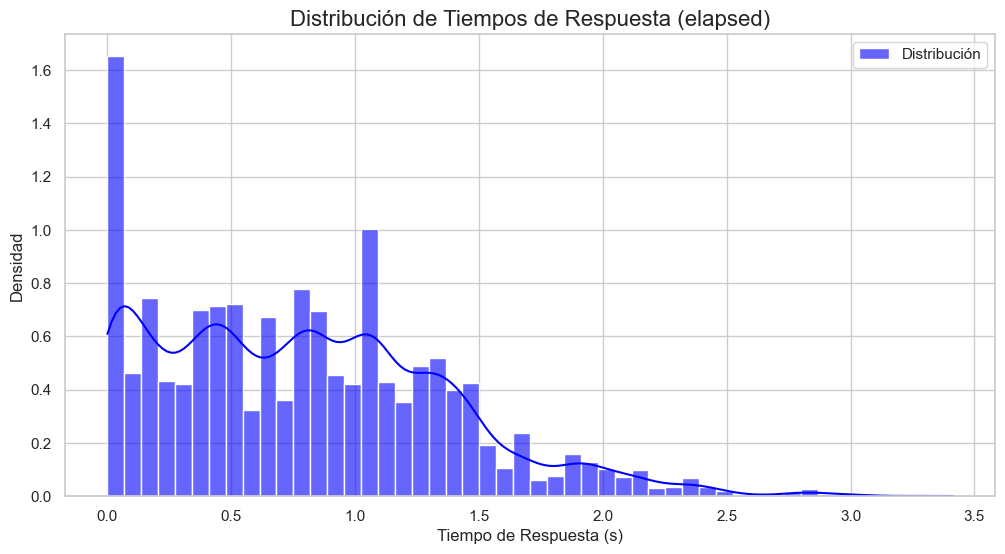

In [29]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data['elapsed']/1000, bins=50, kde=True, color='blue', stat="density", alpha=0.6, label="Distribución")

plt.title("Distribución de Tiempos de Respuesta (elapsed)", fontsize=16)
plt.xlabel("Tiempo de Respuesta (s)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()

plt.show()

La mayor parte de las peticiones se están respondiendo de 0 a 1.5 segundos, sin embargo, algunas tardan más indicando problemas de rendimiento.


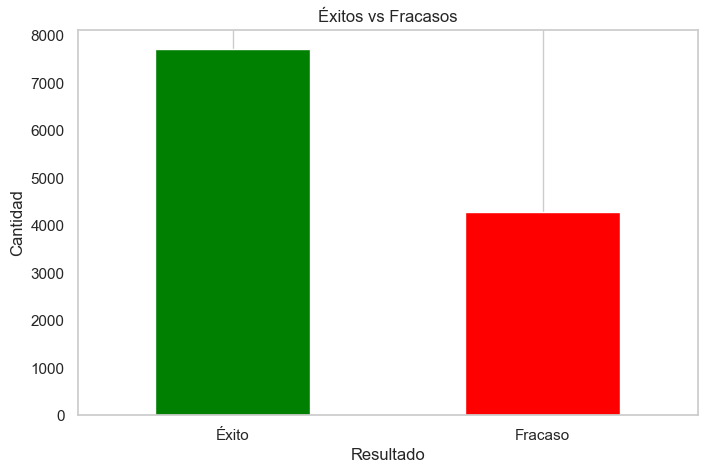

In [30]:
success_counts = data['success'].value_counts()

plt.figure(figsize=(8, 5))
success_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Éxitos vs Fracasos')
plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Éxito', 'Fracaso'], rotation=0)
plt.grid(axis='y')
plt.show()

Aproximadamente el 0.62% de las solicitudes están siendo procesadas correctamente, sin embargo, hay una proporción considerable de solicitudes que están fallando.

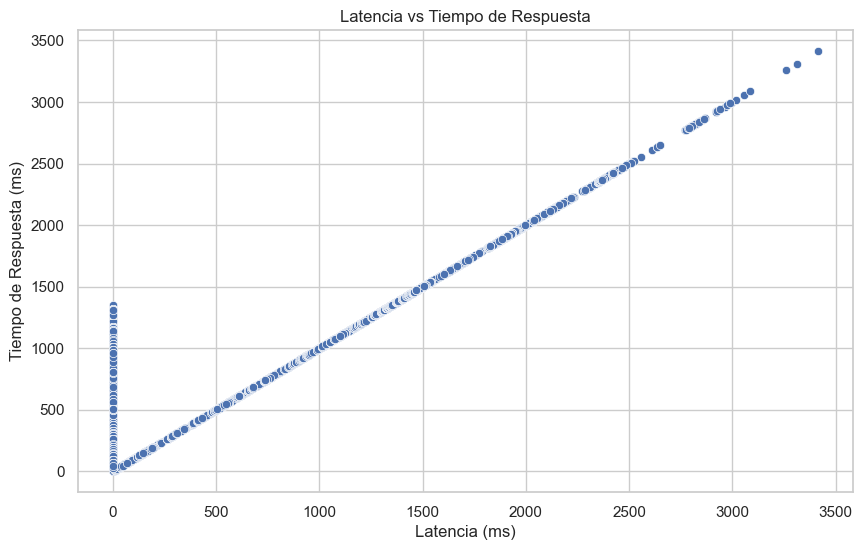

In [31]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Latency', y='elapsed', data=data) 
plt.title('Latencia vs Tiempo de Respuesta') 
plt.xlabel('Latencia (ms)') 
plt.ylabel('Tiempo de Respuesta (ms)') 
plt.show()

 A medida que la latencia aumenta, también lo hace el tiempo de respuesta. Sugiriendo que la latencia esta afectando directamente el rendimiento del sistema. Pero en este caso cuando la latencia es 0 se tiene un tiempo de respuestas de 0 a 1400ms aproximadamente.


## Versión 2

Desplegar con kubernetes 1 replica

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


data = pd.read_csv("./v2/Añadir_Inmueble/añadir_inmueble_12000_graph_result.csv")
data.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1733085750539,734,Añadir Inmueble,200,NaN,Thread Group 1-121,text,True,NaN,695,441,613,613,http://localhost:30200/api/inmuebles/agregar,733,0,0
1,1733085750604,670,Añadir Inmueble,200,NaN,Thread Group 1-138,text,True,NaN,695,441,613,613,http://localhost:30200/api/inmuebles/agregar,670,0,0
2,1733085750579,695,Añadir Inmueble,200,NaN,Thread Group 1-142,text,True,NaN,695,441,614,614,http://localhost:30200/api/inmuebles/agregar,695,0,1
3,1733085750587,688,Añadir Inmueble,200,NaN,Thread Group 1-28,text,True,NaN,695,441,612,612,http://localhost:30200/api/inmuebles/agregar,685,0,0
4,1733085750576,699,Añadir Inmueble,200,NaN,Thread Group 1-44,text,True,NaN,695,441,611,611,http://localhost:30200/api/inmuebles/agregar,698,0,0


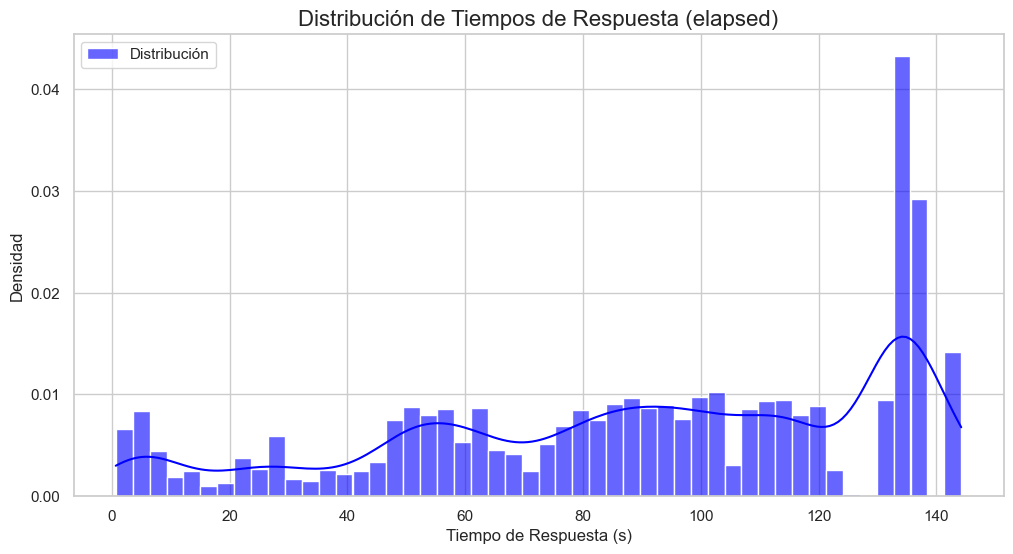

In [8]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data['elapsed']/1000, bins=50, kde=True, color='blue', stat="density", alpha=0.6, label="Distribución")

plt.title("Distribución de Tiempos de Respuesta (elapsed)", fontsize=16)
plt.xlabel("Tiempo de Respuesta (s)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()


plt.show()


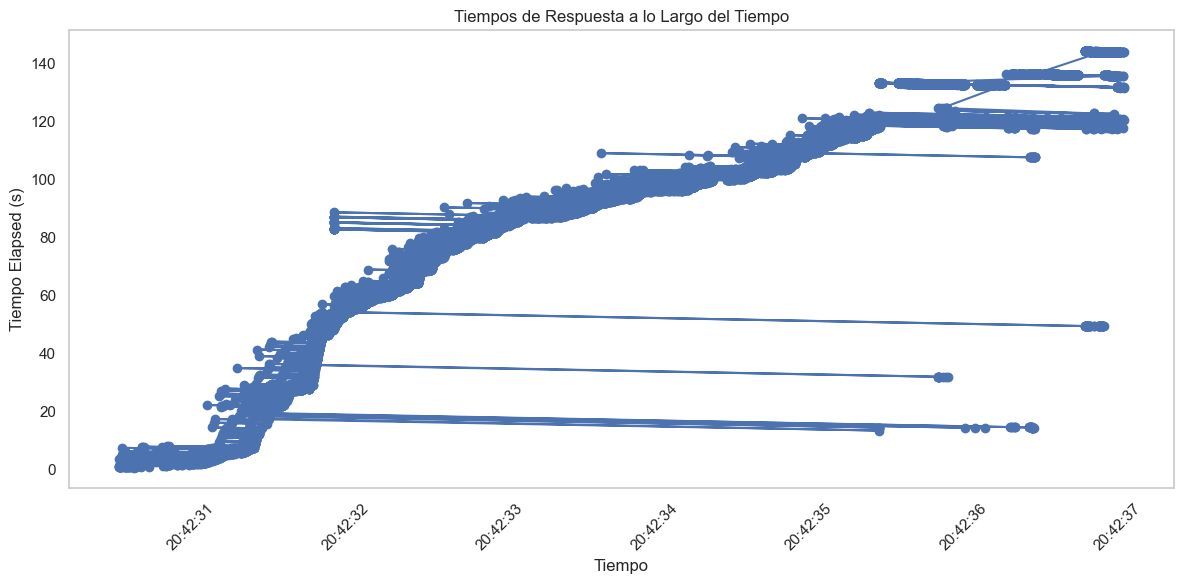

In [15]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'], unit='s')


plt.figure(figsize=(12, 6))
plt.plot(data['timeStamp'], data['elapsed']/1000, marker='o', linestyle='-')
plt.title('Tiempos de Respuesta a lo Largo del Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Tiempo Elapsed (s)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

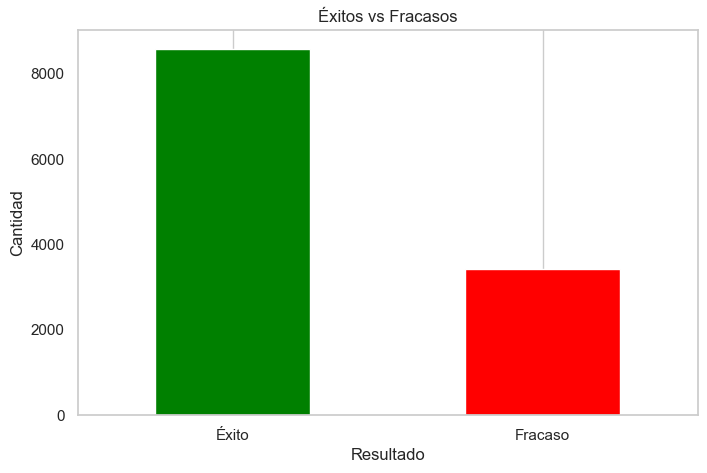

In [16]:
success_counts = data['success'].value_counts()

plt.figure(figsize=(8, 5))
success_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Éxitos vs Fracasos')
plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Éxito', 'Fracaso'], rotation=0)
plt.grid(axis='y')
plt.show()

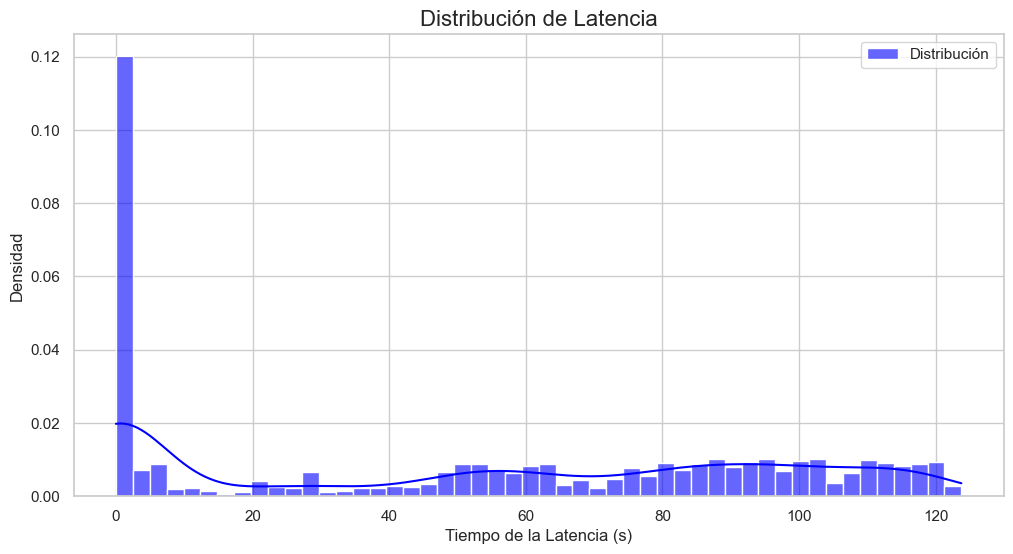

In [20]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data['Latency']/1000, bins=50, kde=True, color='blue', stat="density", alpha=0.6, label="Distribución")

plt.title("Distribución de Latencia", fontsize=16)
plt.xlabel("Tiempo de la Latencia (s)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()


plt.show()

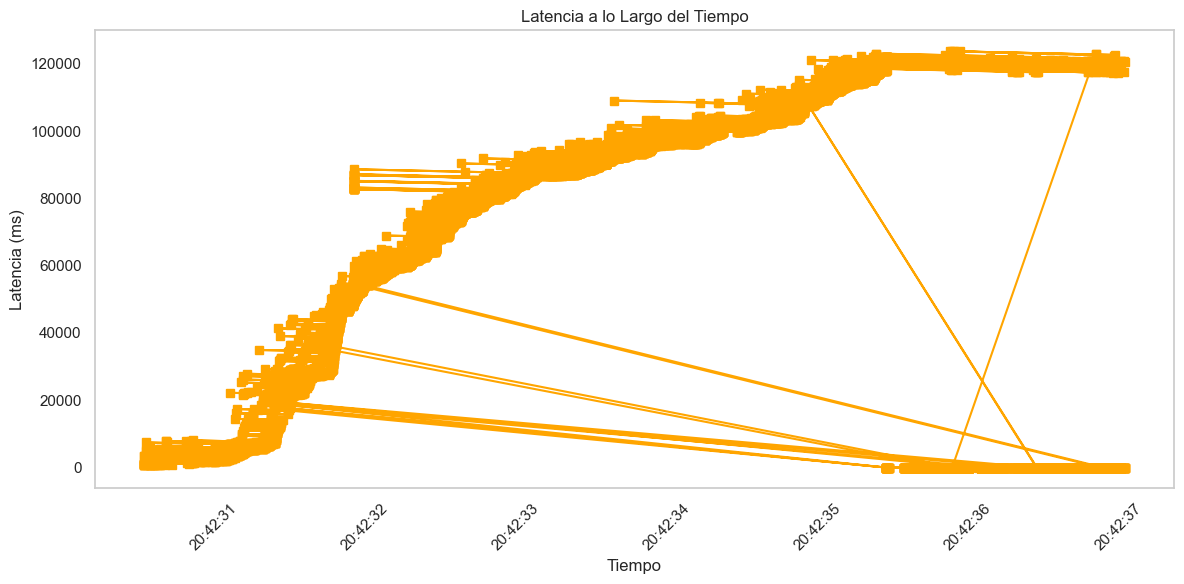

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(data['timeStamp'], data['Latency'], marker='s', linestyle='-', color='orange')
plt.title('Latencia a lo Largo del Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Latencia (ms)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

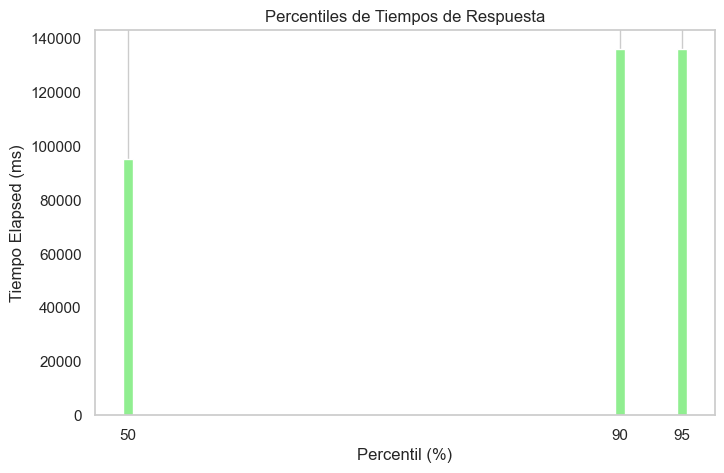

In [23]:
percentiles = [50, 90, 95]
percentile_values = [data['elapsed'].quantile(p / 100) for p in percentiles]

plt.figure(figsize=(8, 5))
plt.bar(percentiles, percentile_values, color='lightgreen')
plt.title('Percentiles de Tiempos de Respuesta')
plt.xlabel('Percentil (%)')
plt.ylabel('Tiempo Elapsed (ms)')
plt.xticks(percentiles)
plt.grid(axis='y')
plt.show()

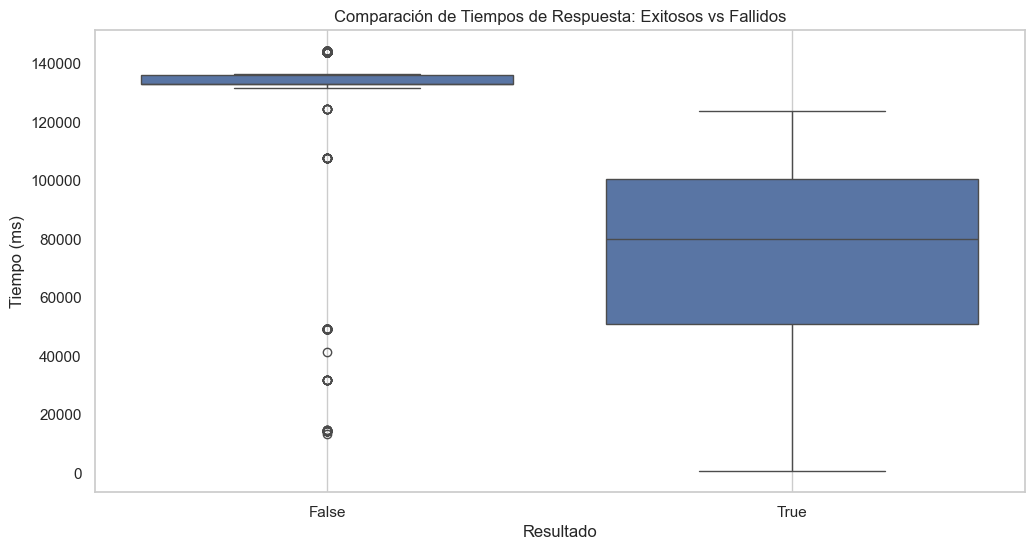

In [ ]:
import seaborn as sns

success_df = data[data['success'] == 'true']
failure_df = data[data['success'] == 'false']

plt.figure(figsize=(12, 6))
sns.boxplot(x='success', y='elapsed', data=data)
plt.title('Comparación de Tiempos de Respuesta: Exitosos vs Fallidos')
plt.xlabel('Resultado')
plt.ylabel('Tiempo (ms)')
plt.grid()
plt.show()

In [36]:
file_listar = '/v2/data/listar_inmuebles_12000_graph_result.csv'
file_opinion = '/v2//lista_opinion_usuario_12000_graph_result.csv'

data_listar = pd.read_csv("./v2/Lista_Inmuebles/listar_inmuebles_12000_graph_result.csv")
data_opinion = pd.read_csv("./v2/Lista_Opiniones_Usuario/lista_opinion_usuario_12000_graph_result.csv")

# Mostrar la estructura y primeras filas de los nuevos archivos
(data_listar.head(), data_listar.info()), (data_opinion.head(), data_opinion.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timeStamp        12000 non-null  int64  
 1   elapsed          12000 non-null  int64  
 2   label            12000 non-null  object 
 3   responseCode     12000 non-null  object 
 4   responseMessage  3013 non-null   object 
 5   threadName       12000 non-null  object 
 6   dataType         12000 non-null  object 
 7   success          12000 non-null  bool   
 8   failureMessage   0 non-null      float64
 9   bytes            12000 non-null  int64  
 10  sentBytes        12000 non-null  int64  
 11  grpThreads       12000 non-null  int64  
 12  allThreads       12000 non-null  int64  
 13  URL              12000 non-null  object 
 14  Latency          12000 non-null  int64  
 15  IdleTime         12000 non-null  int64  
 16  Connect          12000 non-null  int64  
dtypes: bool(1), 

((       timeStamp  elapsed            label responseCode responseMessage  \
  0  1733085919008     9376  Listar Inmueble          200             NaN   
  1  1733085919008     9494  Listar Inmueble          200             NaN   
  2  1733085919008     9515  Listar Inmueble          200             NaN   
  3  1733085919008     9705  Listar Inmueble          200             NaN   
  4  1733085919019     9772  Listar Inmueble          200             NaN   
  
            threadName dataType  success  failureMessage    bytes  sentBytes  \
  0   Thread Group 1-5     text     True             NaN  3723762        135   
  1   Thread Group 1-8     text     True             NaN  3723762        135   
  2   Thread Group 1-1     text     True             NaN  3723762        135   
  3   Thread Group 1-3     text     True             NaN  3723762        135   
  4  Thread Group 1-10     text     True             NaN  3723762        135   
  
     grpThreads  allThreads                         

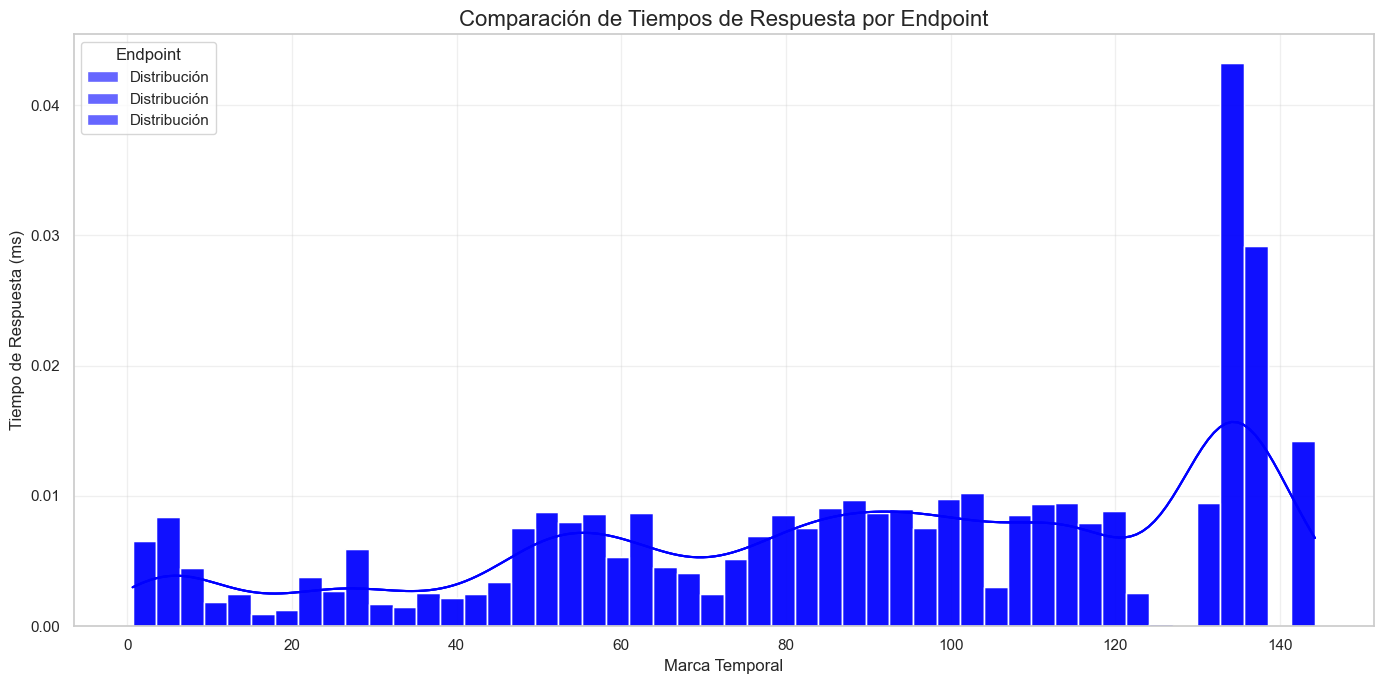

In [ ]:
# Preparar los datos combinados para la gráfica
data_combined = pd.concat([
    data.assign(label='Añadir Inmueble'),
    data_listar.assign(label='Listar Inmueble'),
    data_opinion.assign(label='Obtener Opinión por Usuario')
])

# Convertir la columna timeStamp a formato datetime
data_combined['timeStamp'] = pd.to_datetime(data_combined['timeStamp'], unit='ms')

# Crear la gráfica de líneas
plt.figure(figsize=(14, 7))
for label, group in data_combined.groupby('label'):
    sns.histplot(group['elapsed']/1000, bins=50, kde=True, color='blue', stat="density", alpha=0.6, label="Distribución")

    
plt.title('Comparación de Tiempos de Respuesta por Endpoint', fontsize=16)
plt.xlabel('Marca Temporal', fontsize=12)
plt.ylabel('Tiempo de Respuesta (ms)', fontsize=12)
plt.legend(title='Endpoint')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## Versión 3

Desplegar con kubernetes 2 replicas

## Versión 4

Desplegar con kubernetes 4 replicas

## Versión 5

En esta quinta versión del backend, se implementará una arquitectura basada en contenedores utilizando Docker. Se configurarán cuatro contenedores: uno para el backend, que gestionará la lógica de la aplicación y la API; otro para la base de datos, que almacenará los datos de inmuebles y opiniones de los usuarios; uno más para Prometheus, que se encargará del monitoreo del rendimiento del backend; y un último contenedor para Grafana, que se utilizará para la visualización de los datos recopilados por Prometheus. El objetivo es evaluar cómo se comporta el backend al ser desplegado en este entorno de contenedores, garantizando que todos los servicios interactúen de manera eficiente, escalable y con una adecuada visualización de métricas de rendimiento.


<div style="margin-left: 200px;">
    <img src="./Multimedia/V5.png" alt="Diagrama versión 1" width="500px" height="220">
</div>

## Versión 6

Desplegar con kubernetes 1 replica agregando monitoreo de prometheus y visualización con grafana

## Versión 7

Desplegar con kubernetes 2 replicas agregando monitoreo de prometheus y visualización con grafana

## Versión 8

Desplegar con kubernetes 4 replicas agregando monitoreo de prometheus y visualización con grafana